#### Importing libraries

In [246]:
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#### Load data

In [247]:
df = pd.read_csv("Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv", index_col=0)
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0


#### Shape of the dataset

In [248]:
print('Number of cases: {}\nNumber of features: {}'.format(df.shape[0],df.shape[1]))

Number of cases: 301
Number of features: 7


## ======== Data Cleaning =========

#### Checking for missing values

In [249]:
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["Missing"])
relevant_missing

,Missing
Name,0
Nationality,0
Current Rank,0
Previous Year Rank,24
Sport,0
Year,0
earnings ($ million),0


Being a bit skeptical after seeing some of these datasets, I'm going to display all the unique contents of each column to see if there is anything fishy

In [250]:
for n in df.columns:
    check = df[n].unique()
    print(f'{n}:\n', check, '\n')

Name:
 ['Mike Tyson' 'Buster Douglas' 'Sugar Ray Leonard' 'Ayrton Senna'
 'Alain Prost' 'Jack Nicklaus' 'Greg Norman' 'Michael Jordan'
 'Arnold Palmer' 'Evander Holyfield' 'George Foreman'
 'Donovan "Razor" Ruddock' 'Nigel Mansell' 'Andre Agassi' 'Joe Montana'
 'Jim Courier' 'Monica Seles' 'Riddick Bowe' "Shaquille O'Neal"
 'Lennox Lewis' 'Cecil Fielder' "Shaq O'Neal" 'Gerhard Berger'
 'Wayne Gretzky' 'Michael Moorer' 'Deion Sanders' 'Michael Schumacher'
 'Emmit Smith' 'Dennis Rodman' 'Patrick Ewing' 'Oscar De La Hoya'
 'Tiger Woods' 'Dale Earnhardt' 'Joe Sakic' 'Grant Hill' 'Sergei Federov'
 'Gary Sheffield' 'Kevin Garnett' 'Kobe Bryant' 'Jacques Villeneuve'
 'Jeff Gordon' 'Alex Rodriguez' 'Peyton Manning' 'David Beckham'
 'Michael Vick' 'Lance Armstrong' 'Valentino Rossi' 'Muhammad Ali'
 'Phil Mickelson' 'Tom Brady' 'Kimi Raikkonen' 'Ronaldinho' 'LeBron James'
 'Roger Federer' 'Manny Pacquiao' 'Dale Earnhardt Jr.' 'Floyd Mayweather'
 'Eli Manning' 'Terrell Suggs' 'Cristiano Ronaldo' 

Honestly, the 'Previous Year Rank' is just a mess so I'm going to completely drop it. I'm also not too interested in 'Current Rank' either.

In [251]:
df.drop(['Previous Year Rank', 'Current Rank'], axis=1, inplace=True)

#### Merging case sensitive values in Sports column

In [252]:
df['Sport'] = df['Sport'].str.lower()

#### Replacing values in all columns

In [253]:
a = 'motorsports'
df.replace({'Sport': {'auto racing (nascar)': a,
                      'auto racing': a,
                      'f1 racing': a,
                      'f1 motorsports': a,
                      'nascar': a,
                      'motorcycle gp': a,
                      'nfl': 'american football',
                      'nba': 'basketball',
                      'american football / baseball': 'baseball',
                      'mma': 'mixed martial arts'},
            'Name': {'Aaron Rogers': 'Aaron Rodgers',
                     'Shaq O\'Neal': 'Shaquille O\'Neal'},
            'Nationality': {'Filipino': 'Philippines',
                            'Northern Ireland': 'UK'}}, 
           inplace=True)

Controversial decisions
- Grouped all racing sports under motorsports.
- Since Deion Sanders was a baseball player when he was placed on the Forbes list, I decided to label him as such.
- I asked an Irish friend, although Northern Ireland dislike the UK they assure me, they are still a part of it.

In [254]:
df['Sport'] = df['Sport'].str.title()
df.rename(columns={'earnings ($ million)': 'Earnings ($ million)'}, inplace=True)

After a little research, I found that 2001 did not have an entry on this list due to Forbes changing their reporting period from a full calender year to June-to-June.

#### Checking column data types

In [255]:
df.dtypes

Name                     object
Nationality              object
Sport                    object
Year                      int64
Earnings ($ million)    float64
dtype: object

#### Checking for duplicate rows

In [256]:
# count the number of duplicate rows
num_duplicates = df.duplicated().sum()

# print the result
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


## ======= EDA ========

In [257]:
df

,Name,Nationality,Sport,Year,Earnings ($ million)
S.NO,,,,,
1,Mike Tyson,USA,Boxing,1990,28.6
2,Buster Douglas,USA,Boxing,1990,26.0
3,Sugar Ray Leonard,USA,Boxing,1990,13.0
4,Ayrton Senna,Brazil,Motorsports,1990,10.0
5,Alain Prost,France,Motorsports,1990,9.0
...,...,...,...,...,...
297,Stephen Curry,USA,Basketball,2020,74.4
298,Kevin Durant,USA,Basketball,2020,63.9
299,Tiger Woods,USA,Golf,2020,62.3


### Frequencies

#### Who appears most in the list?

([<matplotlib.axis.XTick at 0x1be60f2fc90>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20')])

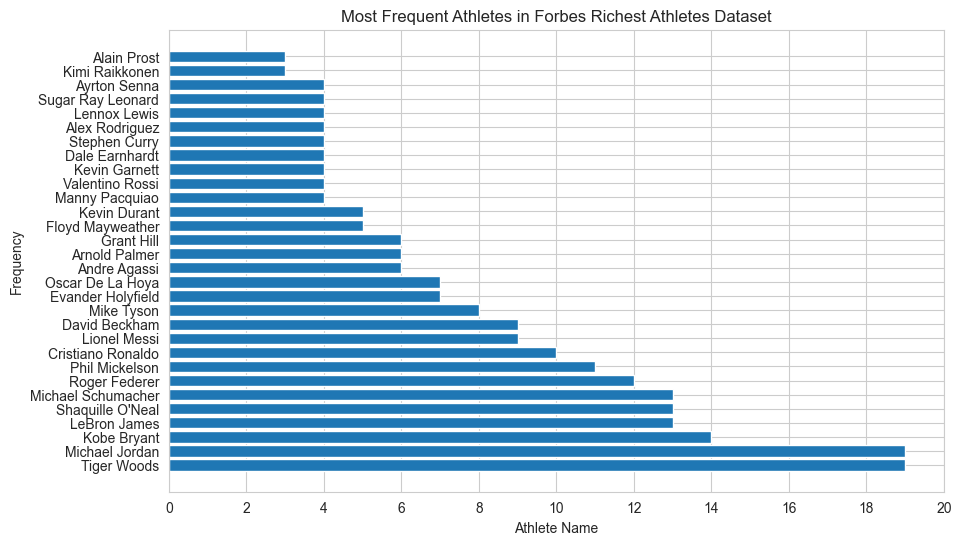

In [258]:
# Count the number of times each athlete appears in the dataset
athlete_counts = df['Name'].value_counts()

# Get the top 30 most frequent athletes
top_30_athletes = athlete_counts[:30]

# Create a bar chart of the top 30 most frequent athletes
plt.figure(figsize=(10, 6))
plt.barh(top_30_athletes.index, top_30_athletes.values)
plt.xlabel('Athlete Name')
plt.ylabel('Frequency')
plt.title('Most Frequent Athletes in Forbes Richest Athletes Dataset')
plt.xticks(range(0, max(top_30_athletes.values)+2, 2))

- Tiger woods and Michael Jordan tie for having the most appearances at 19.
- Tailed by Kobe, LebBron and Shaquille who are all basketball players.
- Quite a few of the people in the top 30 seem to reside at 4 appearances, making that the mode of this set.

#### How about Nationality and Sport?

Text(0.5, 1.0, 'Top 5 Nationalities in Forbes Richest Athletes Dataset')

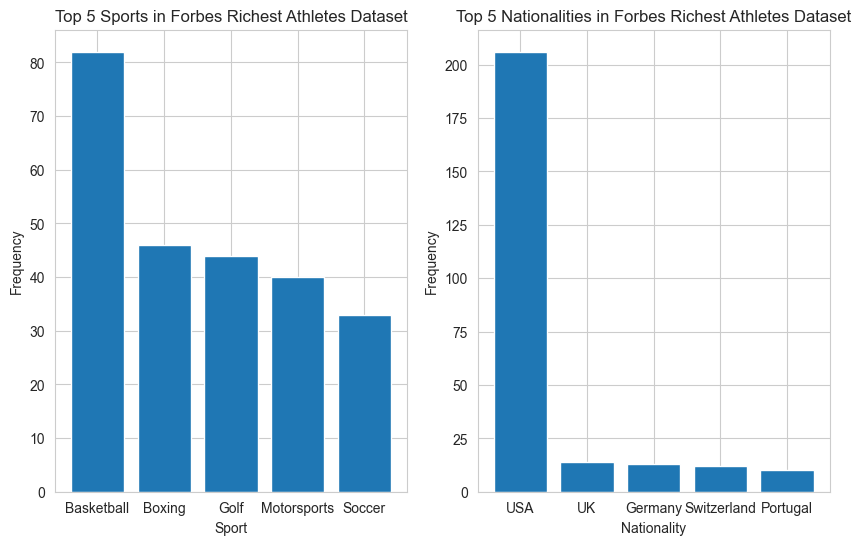

In [259]:
# Top 5 most frequent sports
sport_counts = df['Sport'].value_counts()
top_5_sports = sport_counts[:5]

# Top 5 most frequent nationalities
nationality_counts = df['Nationality'].value_counts()
top_5_nationalities = nationality_counts[:5]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

# Plot the top 5 most frequent sports
ax1.bar(top_5_sports.index, top_5_sports.values)
ax1.set_xlabel('Sport')
ax1.set_ylabel('Frequency')
ax1.set_title('Top 5 Sports in Forbes Richest Athletes Dataset')

# Plot the top 5 most frequent nationalities
ax2.bar(top_5_nationalities.index, top_5_nationalities.values)
ax2.set_xlabel('Nationality')
ax2.set_ylabel('Frequency')
ax2.set_title('Top 5 Nationalities in Forbes Richest Athletes Dataset')

Sport
- Having 4 basketball players at the top of the last list definitely helped in making basketball the most popular sport in the list, absolutely dwarfing the rest by almost twice as much.
- Flanked by boxing, golf and motorsports who seem to be almost neck and neck with each other. 

Nationality
- USA has absolutely wiped the rest of the countries out of the park when it comes to appearances in the list.
- The UK, Germany and Switzerland seem to be lagging behind by what seems like 1/15th of what the USA is bringing to the table.

### Lets talk about money

#### The distribution of earnings across sports

Text(0, 0.5, 'Earnings ($ million)')

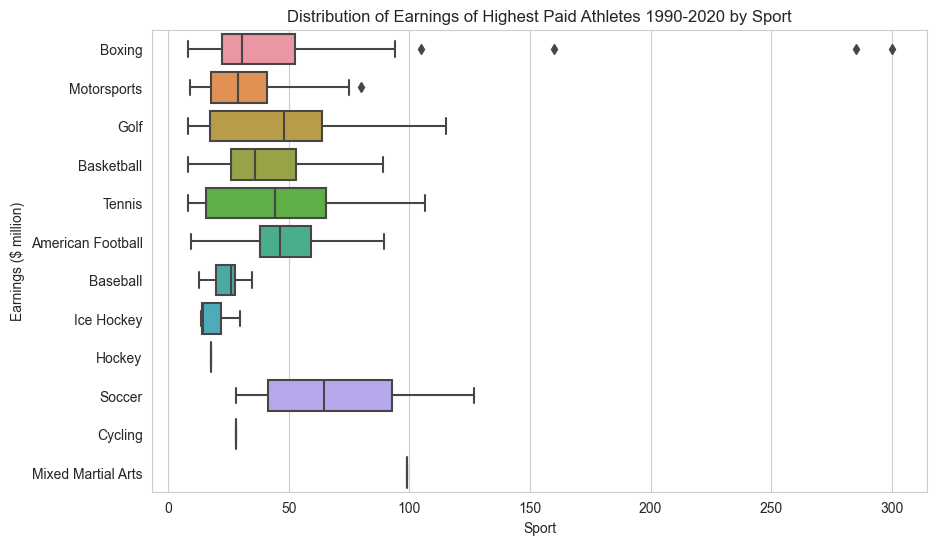

In [260]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Sport', x='Earnings ($ million)', data=df)
plt.title('Distribution of Earnings of Highest Paid Athletes 1990-2020 by Sport')
plt.xlabel('Sport')
plt.ylabel('Earnings ($ million)')

- Boxing has by far some of the largest payouts, however it seems like these are just freak occurences compared to their average takings.
- Golf seems to have the largest statistically significant spread.
- Soccer surprisingly seems to be higher up the scale than the rest, with the highest mean and max.
- Cycling, Hockey and MMA don't seem to have enough data to go off to make observations, however MMA seems to have potential.
- I would argue that Ice Hockey is probably one of the worst off sports in this list, already being low as it is but then also skewering the the left as well.
- My prediction was going to be that due to the USA being so prevelent in the list, american football and basketball would dwarf the rest when it came to pay, however I am genuienly surprised that they are on the lower end of the scale.
- Tennis and soccer have a rather large interquartile, showing that there is quite a large range for the intermediate players pay.
- The minimum value for the majority of the sports tend to be very similiar.

#### Which sport grabbed the biggest individual year contract?

Text(0, 0.5, 'Sport')

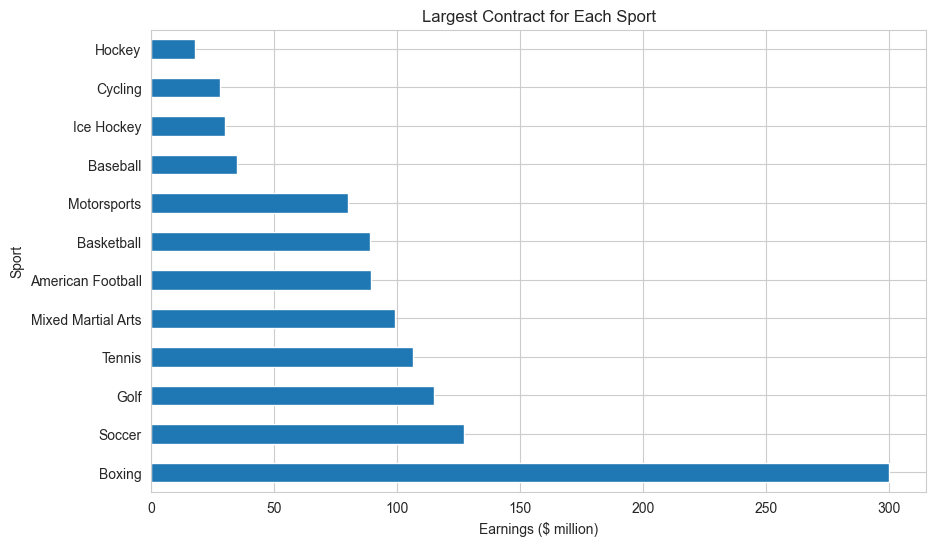

In [261]:
# group the dataframe by sport and find the maximum earnings for each group
largest_contract = df.groupby('Sport')['Earnings ($ million)'].max()

# sort the values in descending order
largest_contract = largest_contract.sort_values(ascending=False)

# plot a horizontal bar chart of the largest contract for each sport
plt.figure(figsize=(10, 6))
largest_contract.plot(kind='barh')
plt.title('Largest Contract for Each Sport')
plt.xlabel('Earnings ($ million)')
plt.ylabel('Sport')

- The bigger contracts go toward boxing, this can be due to boxing having rare but big matches that people all around the world tune into see. Good marketing also manages to get a large audience interested when needed.
- Soccer follows shortly behind at second place.

#### What portion of the sum wealth accrued do those large contracts take up?

Text(0.5, 1.0, 'Sum Wealth of Sport with Largest Contract Shaded')

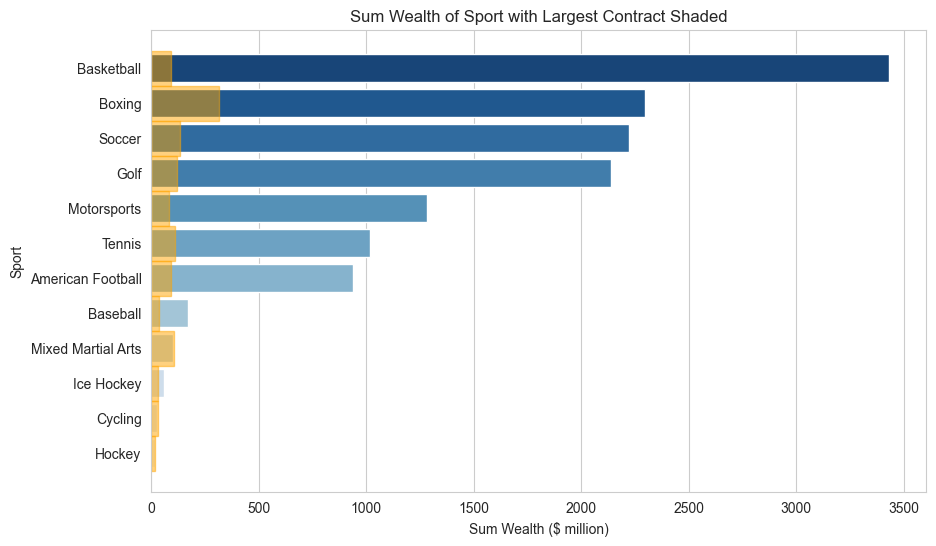

In [262]:
# Calculate the total wealth for each sport
sport_wealth = df.groupby('Sport')['Earnings ($ million)'].sum()

# sort the values in descending order
sport_wealth = sport_wealth.sort_values(ascending=False)

# Create a horizontal bar chart
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(y=sport_wealth.index, x=sport_wealth.values, palette='Blues_r')

# Shade the bar that represents the largest contract for each sport
for i, sport in enumerate(sport_wealth.index):
    plt.axhspan(i-0.5, i+0.5, xmin=0, xmax=largest_contract[sport]/sport_wealth.max(), alpha=0.5, color='orange')
    
# Add labels and titles
plt.xlabel('Sum Wealth ($ million)')
plt.ylabel('Sport')
plt.title('Sum Wealth of Sport with Largest Contract Shaded')

- My theory with boxing being a rare occurence but bringing the most money when it does is supported here, with one contract taking up such a large portion of the sum earning of the sport.
- Basketball players do not tend to get paid a crazy amount as we have seen earlier, however due to the sheer volume of them appearing on the list, they have been pushed to first.
- See Golf I am puzzled by, I don't hear much about golf and yet it does so well.
- I expected motorsports to be a lot higher up on this, since in the UK there is such a large audience.

#### Which individual earned the most sum of money across the years?

Text(0.5, 1.0, 'Top 10 Richest Athletes in Forbes Richest Athletes Dataset')

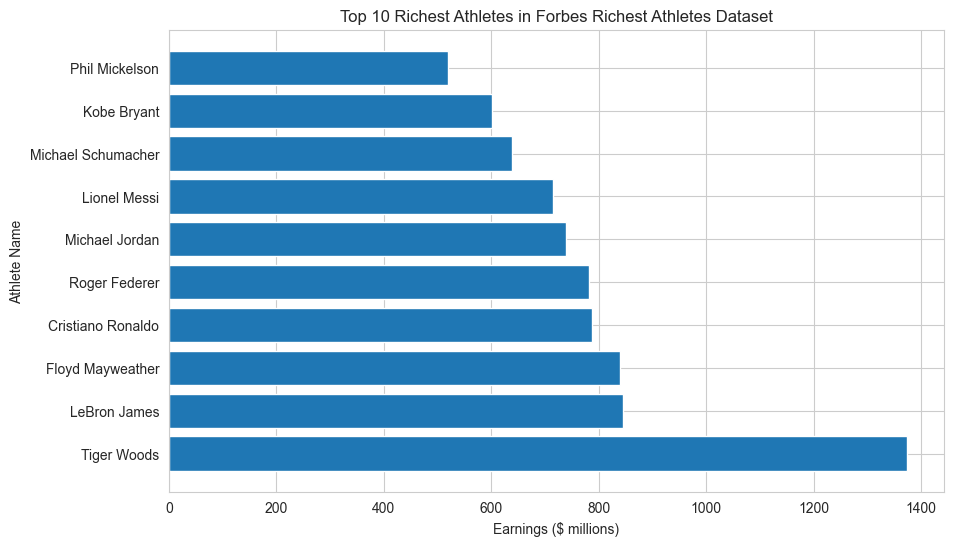

In [263]:
# Group the data by athlete name and sum up their earnings
athlete_earnings = df.groupby('Name')['Earnings ($ million)'].sum()

# Sort the data in descending order to get the top 10
top_10_athletes = athlete_earnings.sort_values(ascending=False)[:10]

# Create a bar chart of the top 10 richest athletes
plt.figure(figsize=(10, 6))
plt.barh(top_10_athletes.index, top_10_athletes.values)
plt.xlabel('Earnings ($ millions)')
plt.ylabel('Athlete Name')
plt.title('Top 10 Richest Athletes in Forbes Richest Athletes Dataset')

- First place we have a golfer, who is also tied for most appearances on the list, explaining how he got so much accumulative wealth. Dominating the rest and securing a towering lead here.

### Best of the years

#### Which year paid their athletes the most?

Text(0.5, 1.0, 'Total Earnings by Year')

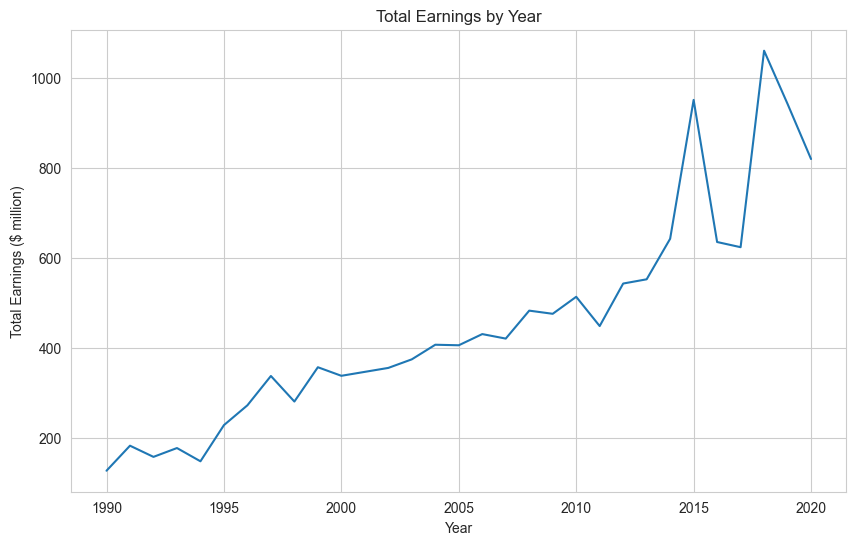

In [264]:
year_earnings = df.groupby('Year')['Earnings ($ million)'].sum()

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(x=year_earnings.index, y=year_earnings.values)
plt.xlabel('Year')
plt.ylabel('Total Earnings ($ million)')
plt.title('Total Earnings by Year')

- The total earnings in sports has definitely risen over the years, with 2020 absolutely trumping 1990.
- It has been a steady increase over the years, at around 2014 however the gentle increase suddenly had a shoot in earnings, must have been a very expensive year for sports that soon became the normal.

#### How does each sport do for earnings year by year?

Text(0.5, 1.0, 'Total Earnings by Year and Sport')

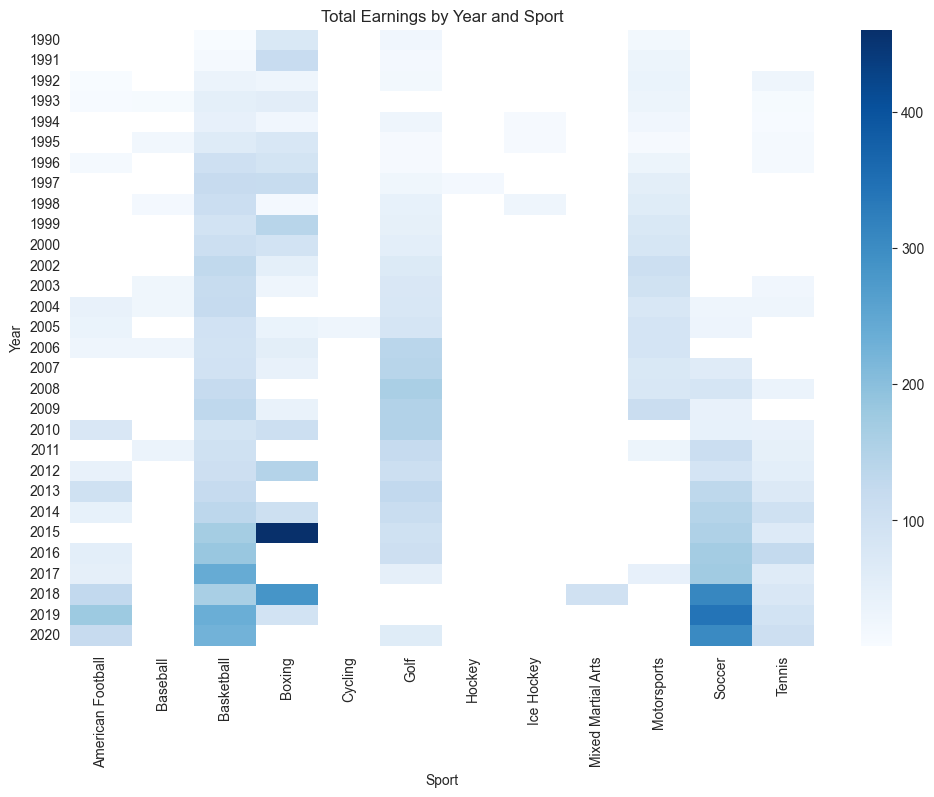

In [265]:
# Group the data by year and sport, and calculate the total earnings
year_sport_earnings = df.groupby(['Year', 'Sport'])['Earnings ($ million)'].sum().reset_index()

# Pivot the data to create a table with year as rows, sport as columns, and total earnings as values
earnings_table = year_sport_earnings.pivot(index='Year', columns='Sport', values='Earnings ($ million)')

# Create the heatmap
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.heatmap(earnings_table, cmap='Blues')

# Add labels and titles
plt.xlabel('Sport')
plt.ylabel('Year')
plt.title('Total Earnings by Year and Sport')

- Sports such as basketball and golf tend to reliably be on the list, from the looks of it.
- I would group boxing up with them however they do seem to have a handful of hiatus'.
- Both Tennis and American football seem to be getting on the list more consistently in recent years.
- Motorsports seem to have dropped off in popularity at around 2009.
- Soccer has become incredibly popular in the last few years, becoming some of the highest paid sports athletes in the last 3 years.
- The majority of the rest of the sports however seem to be clutching on to past glories, having one-offs in the early 2000s and late 90s.
- MMA however is a very recent addition to the fray.
- Basketball players seem to also be getting a pay rise in the last 5 years.

#### Which year had the most variety with sports?

Text(0.5, 1.0, 'Number of Unique Sports in the Dataset Each Year')

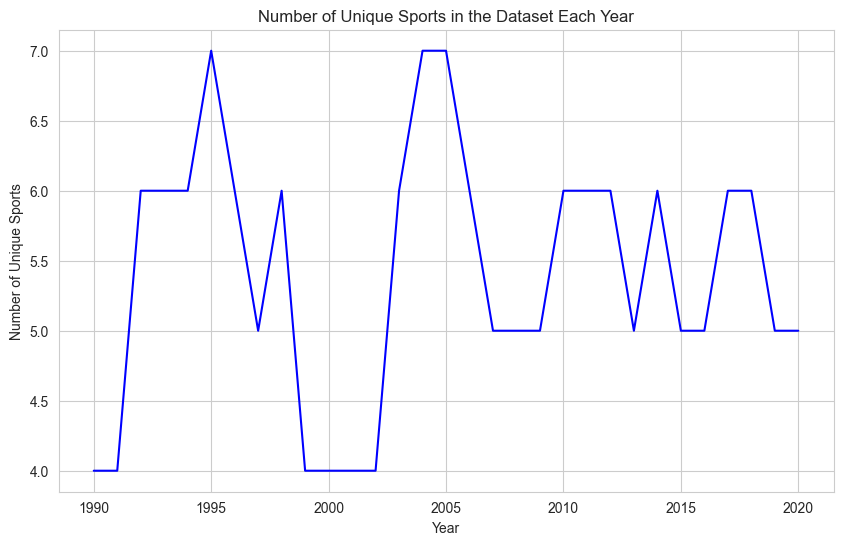

In [266]:
# Group the data by year and count the number of unique sports in each group
sports_per_year = df.groupby('Year')['Sport'].nunique()

# Plot the number of sports per year
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(x=sports_per_year.index, y=sports_per_year.values, color='blue')

# Add labels and titles
plt.xlabel('Year')
plt.ylabel('Number of Unique Sports')
plt.title('Number of Unique Sports in the Dataset Each Year')

- 1999 to 2002 was a very lacking set of years when it came to diversity, only having 4 sports.
- 1995, 2004, 2005 however had some variety however with a record high of 7 different sports being added.
- The average however seems to be around 5 to 6 different sports the majority of the time.

#### What was the distribution of earnings per year?

Text(0.5, 1.0, 'Distribution of Earnings by Year')

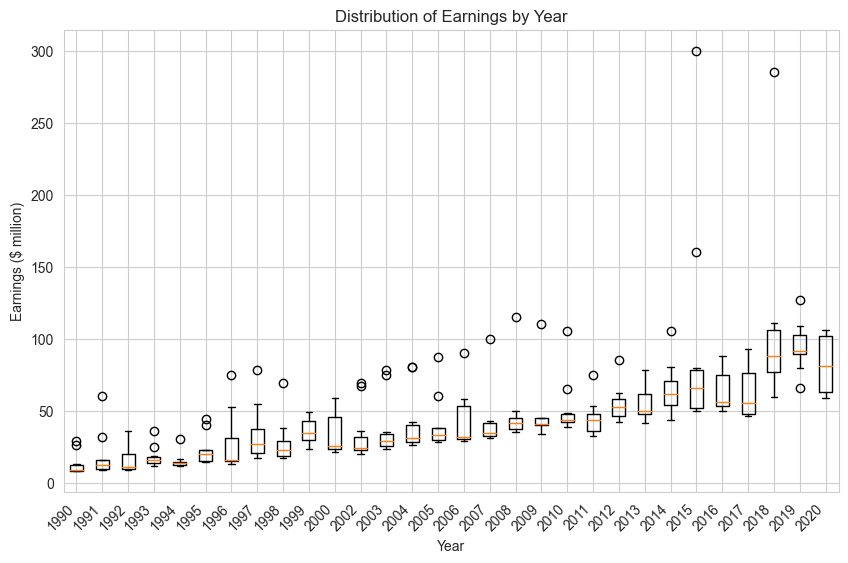

In [267]:
# Group data by year
year_earnings = df.groupby('Year')['Earnings ($ million)'].apply(list)

# Create box plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(year_earnings.values)
ax.set_xticklabels(year_earnings.index, rotation=45, ha='right')
ax.set_xlabel('Year')
ax.set_ylabel('Earnings ($ million)')
ax.set_title('Distribution of Earnings by Year')


- The minimum amount seems to be steadily increasing, either due to an increase of popularity or maybe inflation.
- Most years tend to have their outliers, which shows if you think nothing crazy is happening in the world of sports, you're probably watching the wrong sport.
- For most the years the distribution is skewed the be cheaper, until more recent years where the skews tend more towards being expensive.

#### What was the most diverse year?

Text(0.5, 1.0, 'Number of Different Nationalities in the Dataset Each Year')

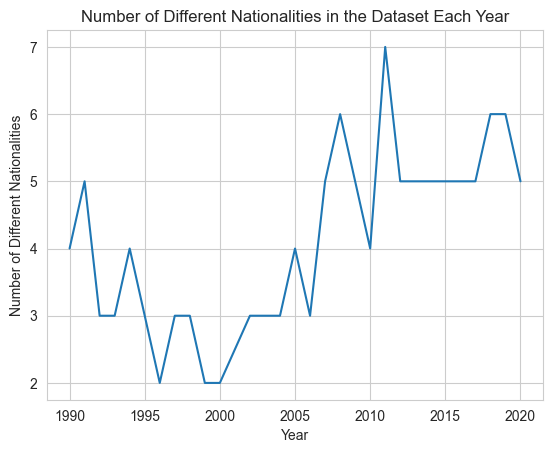

In [268]:
# Group the data by year and nationality, and get the count of unique athletes in each group
year_nationality_counts = df.groupby(['Year', 'Nationality'])['Name'].nunique()

# Group the data by year and get the count of unique nationalities in each group
year_nationality_counts = year_nationality_counts.groupby('Year').count()

# Create a line plot to visualize the trend over time
plt.plot(year_nationality_counts.index, year_nationality_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Different Nationalities')
plt.title('Number of Different Nationalities in the Dataset Each Year')

- Similiar to what we observed on the 'Unique sports per year' line graph, the end of the 90s and start of the 2000s was a very lackluster time, with not much variation.
- At around 2002 however the diversity starts to really ramp up and it just keeps going, reaching a peak at 7 different nationalities in 2011 before plateuing out.